### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading MNIST Dataset

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Loading dataset

# Check shape of dataset
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


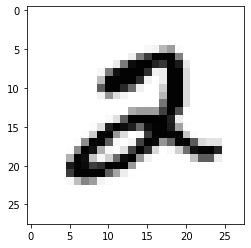

In [3]:
plt.imshow(x_train[5], cmap='Greys')

In [4]:
y_train[5]

2

### One Hot Encoding Dependant Variable (y)

In [5]:
from tensorflow.keras.utils import to_categorical

y_cat_test = to_categorical(y_test, 10)

y_cat_train = to_categorical(y_train, 10)

y_cat_test.shape

(10000, 10)

### Scaling Data

In [6]:
# Converting values from [0, 255] range to [0, 1] range
x_train = x_train / 255
x_test = x_test / 255

x_train[0].max()

1.0

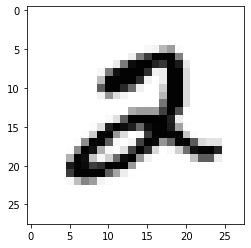

In [7]:
plt.imshow(x_train[5], cmap='Greys')

### Reshaping Data

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train = x_train.reshape(60000, 28, 28, 1)

x_test = x_test.reshape(10000, 28, 28, 1)

x_test.shape

(10000, 28, 28, 1)

### CNN Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
# Convolution layer with 32 filters of size 4x4
# input_shape is shape of each image
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
# Pooling is used to reduce image dimentions
model.add(MaxPool2D(pool_size=(2, 2)))
# Flatten creates a 1D layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Being a muti-class classification, softmax activation function should be used
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

model.summary() # Check model summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1375 - accuracy: 0.9596 - val_loss: 0.0478 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0468 - accuracy: 0.9860 - val_loss: 0.0360 - val_accuracy: 0.9881
Epoch 3/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0389 - val_accuracy: 0.9870
Epoch 4/10
 320/1875 [====>.........................] - ETA: 17s - loss: 0.0191 - accuracy: 0.9946

### Checking & Plotting Accuracy

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.head()

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
losses[['loss','val_loss']].plot()

### Evaluating Model

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0) # loss, accuracy

### Classification Report, Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = np.argmax(model.predict(x_test), axis=-1)

print(classification_report(y_test,predictions))

In [ ]:
confusion_matrix(y_test,predictions)